<a href="https://colab.research.google.com/github/bhanu-50/NETFILX-DATA-ANALYSIS-FOR-CONTINENT-STRATEGY/blob/main/NETFILX-DATA-ANALYSIS-FOR-CONTINENT-STRATEGY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case: Netflix - Data Exploration and Visualisation
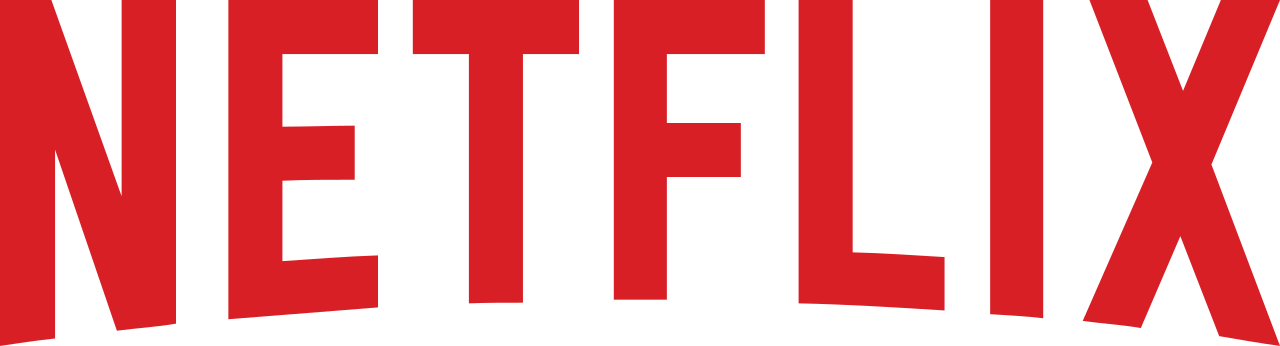

#About Netflix 🍿

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

In this notebook, I'll give an Exploratory Data Analysis of the Netflix dataset. We will explore the data and hopefully bring some insights.

Dataset:https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

In [ ]:
#Download Data set
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 3.89MB/s]


**Importing Libraries and Loading the Dataset**

In [ ]:
# Import Relevant Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# import warnings
# warnings.filterwarnings('ignore')
import copy
from wordcloud import WordCloud

In [ ]:
# Load Data set
df = pd.read_csv('netflix.csv')

**Basic Data Exploration**

In [ ]:
#First 5 Rows Data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#Last 5 Rows Data
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
# Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In this dataset we have

- Type identifier; Movie or Tv Show
- Titles
- Directors
- Cast
- Actors
- Country where the Movie or Tv Show was produced
- Date it was added on Netflix
- Actual Release year of the Content
- Ratings
- Total Duration - in minutes or number of seasons
- listed_in
- Description

In [ ]:
#Data Set Shape
df.shape

(8807, 12)

In [ ]:
# Data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


🪕**Insights**


From the above analysis, it is clear that, data has total of 12 features with lots of mixed alpha numeric data. Also we can see missing data in 5 of the total columns.



**📝 Statistical Summary**

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [ ]:
df['director'].value_counts().head()

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,14


In [ ]:
df['cast'].value_counts().head()

,count
cast,
David Attenborough,19
"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil",14
Samuel West,10
Jeff Dunham,7
"David Spade, London Hughes, Fortune Feimster",6


In [ ]:
df['country'].value_counts().head()

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199


In [ ]:
df['date_added'].value_counts().head()

,count
date_added,
"January 1, 2020",109
"November 1, 2019",89
"March 1, 2018",75
"December 31, 2019",74
"October 1, 2018",71


In [ ]:
df['rating'].value_counts().head()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490


In [ ]:
df['listed_in'].nunique()

514

**🪕 Insights**

**1. Type of content**- Among the 8807 items available on Netflix, 6131 of them are movies, accounting for nearly 70% of the total content. The remaining 30% consists of TV series.

**2. Director**- Rajiv Chilaka holds the top position on the director list, with 19 credits to his name.

**3. Cast**- David Attenborough leads the actor list with 19 appearances in various films and shows on Netflix.

**4. Country**- The USA ranks at the top as the country with the highest production contribution to Netflix, accounting for 35% of the total content.

**5. Date Added**- January 1, 2020, stands out as the peak date for content uploads on Netflix. On that day alone, approximately 109 different shows and movies were added to the platform.

**6.Ratings**- There are 17 different types of ratings present on Netflix. The "TV-MA" (Mature Audience Only) rating dominates the charts, covering almost 36% of the total shows and movies on the platform with this rating.


**7. Genre**- Among the 8807 items available on Netflix, 514 unique genre are listed in the given data.


**👥 Duplicate Detection**

In [ ]:
df.duplicated().value_counts()

,count
False,8807


**🪕 Insights**

There are no duplicate entries in the dataset.

In [ ]:
# checking the value_counts for columns
for i in ['type','release_year','rating','duration']:
    print('Unique Values in',i,'column are :-')
    print(df[i].unique())
    print('-'*70)

Unique Values in type column are :-
['Movie' 'TV Show']
----------------------------------------------------------------------
Unique Values in release_year column are :-
[2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970
 1973 1925 1974 1960 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942
 1955 1944 1947 1943]
----------------------------------------------------------------------
Unique Values in rating column are :-
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']
----------------------------------------------------------------------
Unique Values in duration column are :-
['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 m

In [ ]:
# checking the value_counts for columns
for i in ['type','release_year','rating','duration']:
    print('Value count in',i,'column are :-')
    print(df[i].value_counts())
    print('-'*70)

Value count in type column are :-
type
Movie      6131
TV Show    2676
Name: count, dtype: int64
----------------------------------------------------------------------
Value count in release_year column are :-
release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64
----------------------------------------------------------------------
Value count in rating column are :-
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64
----------------------------------------------------------------------
Value count in duration column are :-
duration
1 Season     1793
2 Seasons     425
3 Seasons    

**🪕 Insights**

There is presense of 3 unusual values in rating column.


**👨🏽‍💻 Missing Value Analysis**


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
print("percentage of nullity: ")
for i in df.columns:
    null_rate = df[i].isnull().sum()/df.shape[0] * 100
    if null_rate > 0:
        print(f"{i}'s null rate : {round(null_rate,2)}%")

percentage of nullity: 
director's null rate : 29.91%
cast's null rate : 9.37%
country's null rate : 9.44%
date_added's null rate : 0.11%
rating's null rate : 0.05%
duration's null rate : 0.03%


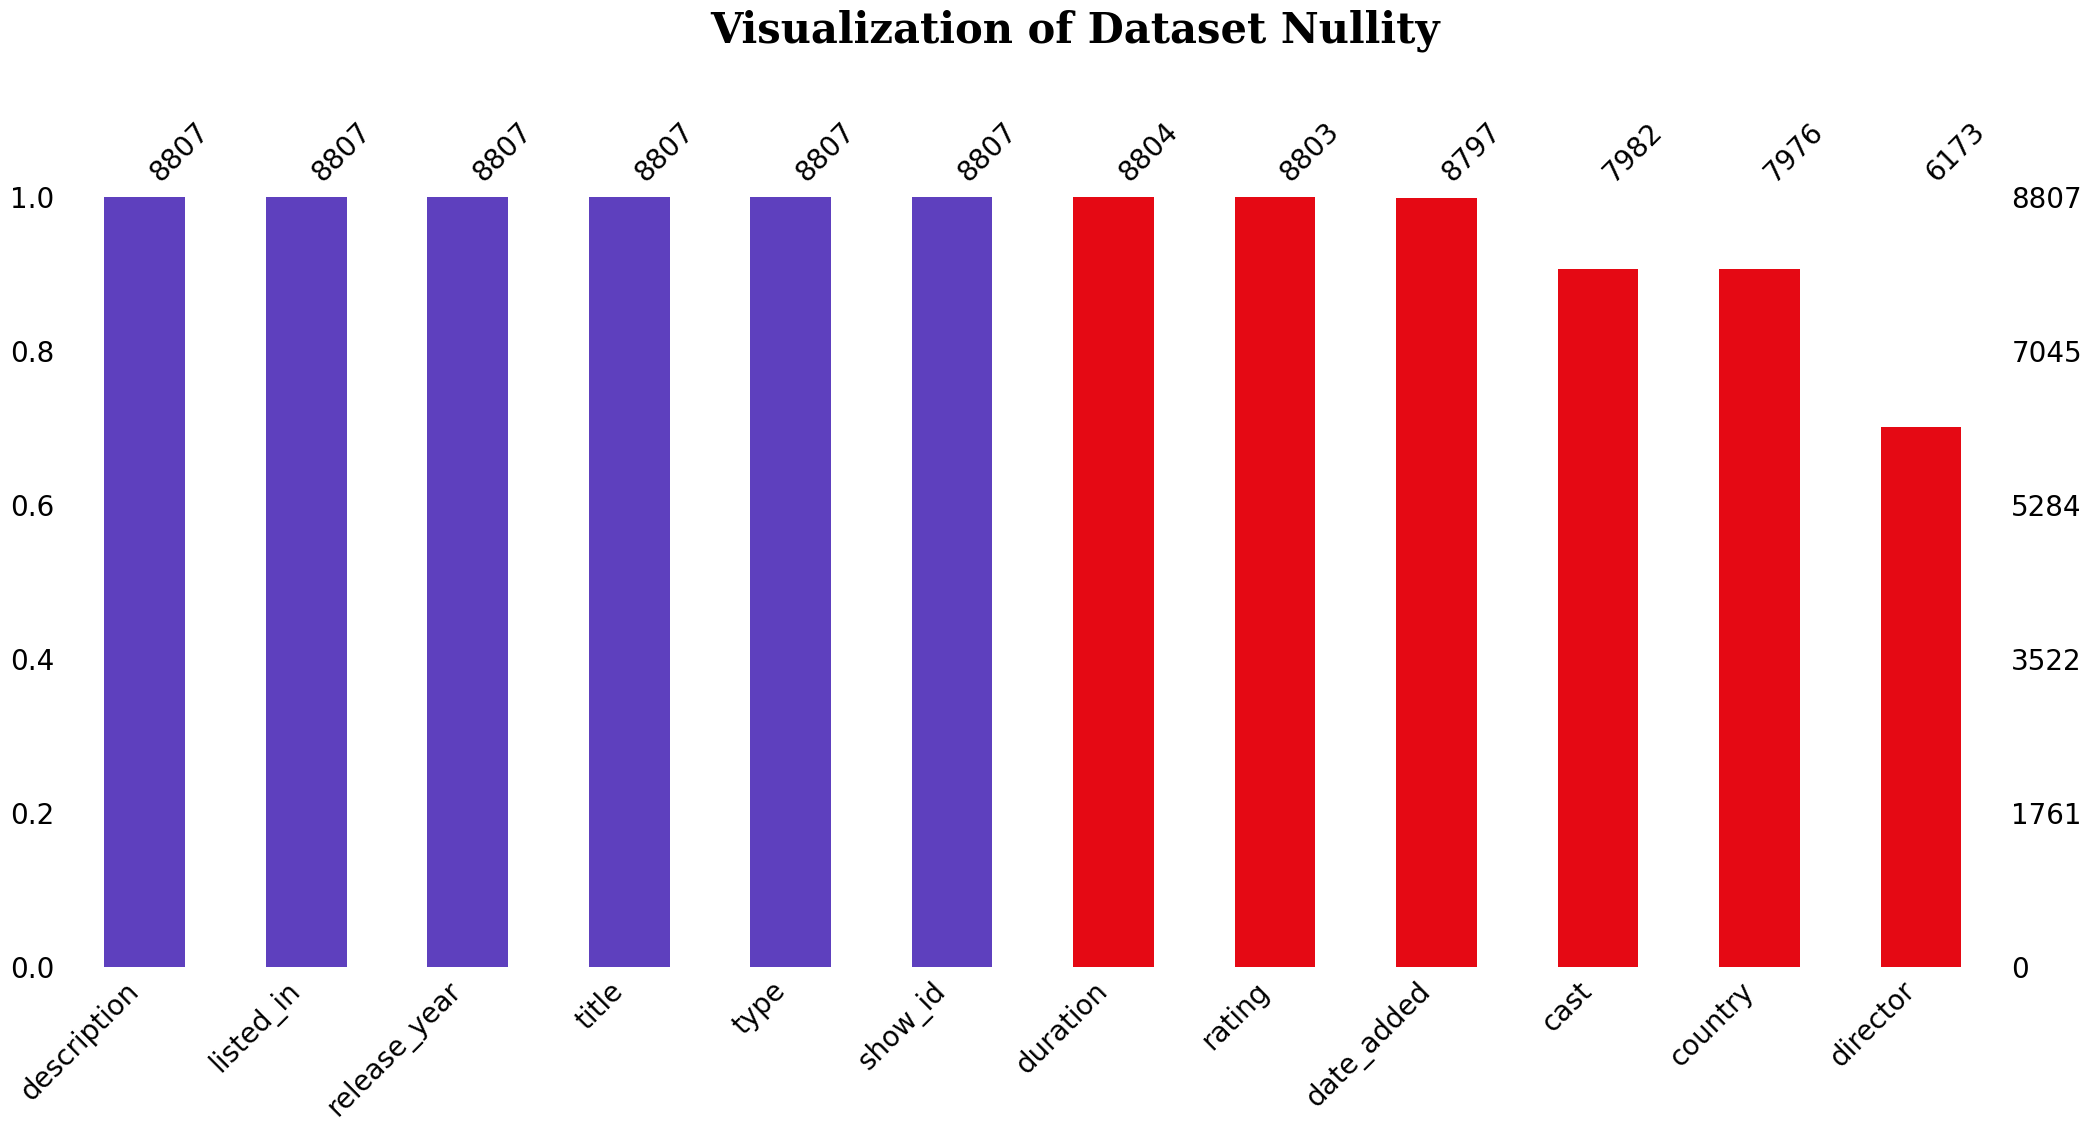

In [ ]:
# missing value visualisation
color = ['#5E40BE','#5E40BE','#5E40BE','#5E40BE','#5E40BE','#5E40BE','#E50914','#E50914','#E50914','#E50914','#E50914','#E50914']
ax = msno.bar(df,sort = 'descending',color = color,fontsize = 20)
ax.text(3.5,1.2,'Visualization of Dataset Nullity',{'font':'serif', 'color':'black','weight':'bold','size':30})
plt.show()

**🪕 Insights**

From our above analysis, there are total of 6 columns containing missing values. Director's column has the most missing values followed by cast and country column. Date added, ratings and duration have significantly less missing values (<1%).


**📍 Approach to fill missing values**


**1. Director Column** - Filling it with Unknown Director.

**2. Cast Column** - Filling it with Unknown Cast.

**3. Country Column** - Filling it with Unknown Country

**4. Date Added Column** - Since it had only 10 missing values, details about it were found from Google. Following details were obtained -



*   A Young Doctor's Notebook and Other Stories - September 15, 2014
* Anthony Bourdain: Parts Unknown - June 1, 2020
* Frasier - April 1, 2015
* Friends - January 1, 2015
* Gunslinger Girl - January 4, 2016
* Kikoriki - July 6, 2017
* La Familia P. Luche - June 1, 2015
* Maron - November 2, 2018
* Red vs. Blue - March 21, 2015
* The Adventures of Figaro Pho - January 1, 2016

**5. Rating Column** - Since it had only 7 missing values, details about it were found from Google. Following details were obtained -

* 13TH: A Conversation with Oprah Winfrey & Ava ... - TV-PG
* Gargantia on the Verdurous Planet - TV-PG
* Little Lunch - TV-Y
* My Honor Was Loyalty - PG-13
* Louis C.K. 2017 - TV-MA
* Louis C.K.: Hilarious - TV-MA
* Louis C.K.: Live at the Comedy Store - TV-MA

**5. Duration Column** - Since it had only 3 missing values, details about it were found from Google. Following details were obtained -

* Louis C.K. 2017 - 74 min
* Louis C.K.: Hilarious - 83 min
* Louis C.K.: Live at the Comedy Store - 65 min


**🔁 Replacing the missing values**

In [ ]:
df['date_added']

,date_added
0,"September 25, 2021"
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"
...,...
8802,"November 20, 2019"
8803,"July 1, 2019"
8804,"November 1, 2019"
8805,"January 11, 2020"


In [ ]:
df.fillna({'director':'Unknown director'},inplace = True)
df.fillna({'cast':'Unknown cast'},inplace = True)
df.fillna({'country':'Unknown country'},inplace = True)

date = {"A Young Doctor's Notebook and Other Stories" : 'September 15, 2014',
       "Anthony Bourdain: Parts Unknown" : 'June 1, 2020',
        "Frasier" : 'April 1, 2015',
        "Friends" : 'January 1, 2015',
        "Gunslinger Girl" : 'January 4, 2016',
        "Kikoriki" : 'July 6, 2017',
        "La Familia P. Luche" : 'June 1, 2015',
        "Maron" : 'November 2, 2018',
        "Red vs. Blue" : 'March 21, 2015',
        "The Adventures of Figaro Pho": 'January 1, 2016'}

for i in date :
    df.loc[df['title'] == i, 'date_added'] = date[i]

ratings = {"13TH: A Conversation with Oprah Winfrey & Ava DuVernay" : 'TV-PG',
         "Gargantia on the Verdurous Planet" : 'TV-PG',
          "Little Lunch" : 'TV-Y',
          "My Honor Was Loyalty" : 'PG-13',
          "Louis C.K. 2017" : 'TV-MA',
          "Louis C.K.: Hilarious" : 'TV-MA',
          "Louis C.K.: Live at the Comedy Store":'TV-MA'}

for i in ratings:
    df.loc[df['title'] == i,'rating'] = ratings[i]

durn = {"Louis C.K. 2017" : '74 min',
          "Louis C.K.: Hilarious" : '83 min',
          "Louis C.K.: Live at the Comedy Store":'65 min'}

for i in durn:
    df.loc[df['title'] == i,'duration'] = durn[i]

In [ ]:
# check
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


**Adding new columns for better analysis**

We will add 3 columns - year_added,month_added,week_added to the df to facilitate further data analysis.

In [ ]:
# converting date_added to datetime column
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')

#adding new columns
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df['week_added'] = df['date_added'].dt.isocalendar().week

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September,38
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September,38
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September,38


**Un-nesting the columns for better analysis**

We will create a new df which has un-nested director,cast and country columns into multiple rows which will help while doing analysis related to them.

In [ ]:
# creating a separate table
df1 = copy.deepcopy(df)


df1["director"] = df["director"].str.split(", ")
df1["cast"] = df["cast"].str.split(", ")
df1["country"] = df["country"].str.split(", ")

df1 = df1.explode(['director'])
df1 = df1.explode(['cast'])
df1 = df1.explode(['country'])
df1.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September,38
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September,38
1,s2,TV Show,Blood & Water,Unknown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September,38


In [ ]:
#checking shape of new df
df1.shape

(89382, 15)

# ***📈Data Visualisation***

**🎬 Content Distribution**

In [ ]:
x = df['type'].value_counts()
x

,count
type,
Movie,6131
TV Show,2676


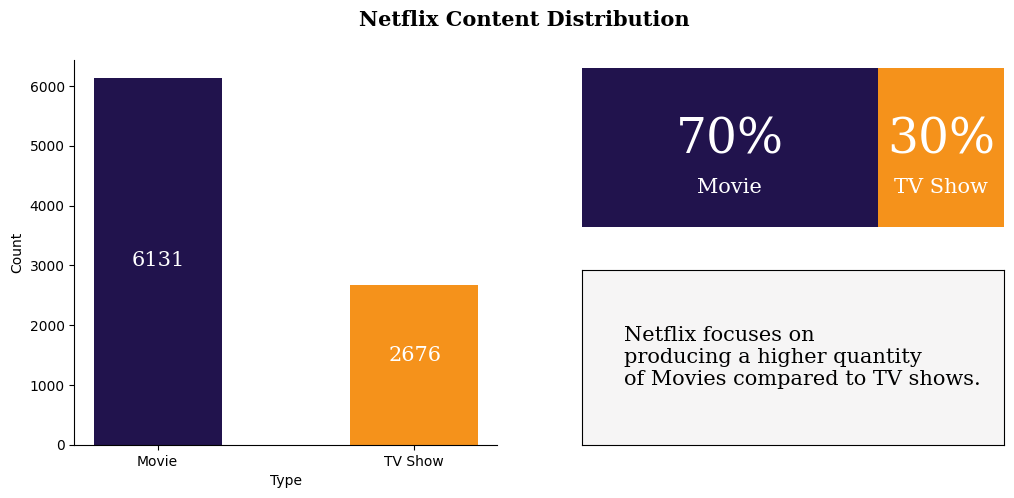

In [ ]:
#setting the plot style
fig = plt.figure(figsize = (12,5))
f_gs = fig.add_gridspec(2,2)

# creating graph for count of movies
ax0 = fig.add_subplot(f_gs[:,0])
ax0.bar(x.index,x.values,color =['#21134D','#F5921B'],zorder = 2,width = 0.5)
ax0.set(ylabel = 'Count')
ax0.set(xlabel = 'Type')

# adding value_count label
ax0.text(-0.1,3000,x.values[0],fontsize=15, fontweight='light', fontfamily='serif',color='white')
ax0.text(0.9,1400,x.values[1],fontsize=15, fontweight='light', fontfamily='serif',color='white')


# removing the axis lines
for s in ['top', 'right']:
    ax0.spines[s].set_visible(False)

# creating the visual for percentage distribution
ax1 = fig.add_subplot(f_gs[0,1])
ax1.barh(x.index[0],0.7,color = '#21134D')
ax1.barh(x.index[0],0.3,left = 0.7,color = '#F5921B')
ax1.set(xlim = (0,1))

#removing the axis info
ax1.set_xticks([])
ax1.set_yticks([])

# adding graph info
ax1.text(0.35,0.04,'70%',va = 'center', ha='center',fontsize=35, fontweight='light', fontfamily='serif',color='white')
ax1.text(0.35,-0.2,'Movie',va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',color='white')
ax1.text(0.85,0.04,'30%',va = 'center', ha='center',fontsize=35, fontweight='light', fontfamily='serif',color='white')
ax1.text(0.85,-0.2,'TV Show',va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',color='white')

#removing the axis lines
for s in ['top', 'left', 'right', 'bottom']:
    ax1.spines[s].set_visible(False)

# adding text insight
ax2 = fig.add_subplot(f_gs[1,1])
ax2.set_facecolor('#f6f5f5')
ax2.set_xticks([])
ax2.set_yticks([])

ax2.text(0.1,0.5,'Netflix focuses on\nproducing a higher quantity\nof Movies compared to TV shows.',
         va = 'center', ha='left',fontsize=15, fontweight='light', fontfamily='serif',color='black')

#adding title to the visual
fig.suptitle('Netflix Content Distribution',fontproperties = {'family':'serif', 'size':15,'weight':'bold'})

plt.show()

# **♈Evolution of Netflix's Growing Library of Movies & TV Shows**

**Analysis of number of Movies and TV shows added over time on Netflix**



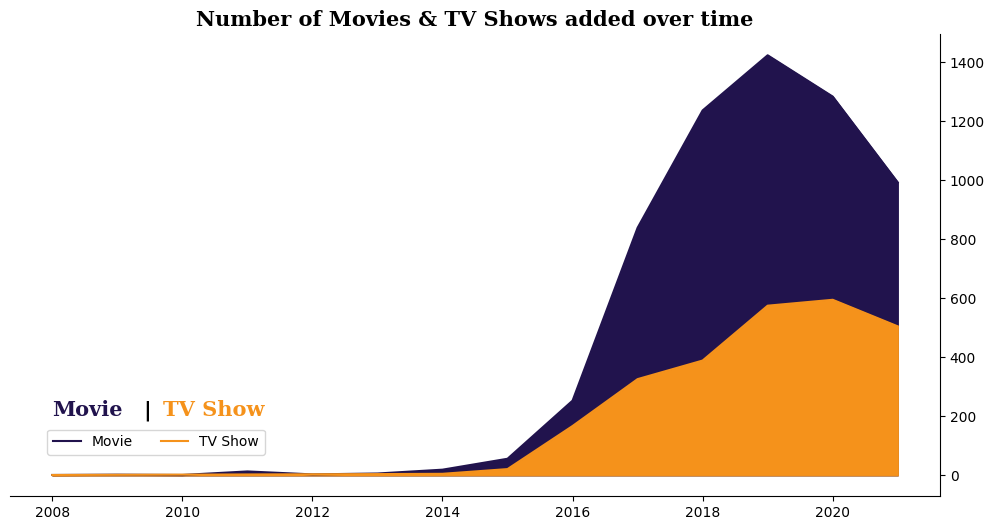

In [ ]:
#setting the plot style
fig,ax = plt.subplots(figsize = (12,6))
color = ['#21134D','#F5921B']

#plotting the visual
for i,type_ in  enumerate(df['type'].unique()):
    temp_df = df.loc[df['type'] == type_,'year_added'].value_counts().sort_index()
    ax.plot(temp_df.index,temp_df.values,color = color[i],label = type_)
    ax.fill_between(temp_df.index,0,temp_df.values,color = color[i])

#changing the y-axis position from left to right
ax.yaxis.tick_right()

#removing the axis lines
for s in ['top','left']:
    ax.spines[s].set_visible(False)

#adding title to the visual
ax.set_title('Number of Movies & TV Shows added over time',
            {'font':'serif', 'size':15,'weight':'bold'})


#adding custom legend
ax.text(2008,200,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#21134D')
ax.text(2009.4,200,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
ax.text(2009.7,200,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#F5921B')
plt.legend(loc = (0.04,0.09),ncol = 2)


plt.show()

**🔍 Insights**

* We see a slow start for Netflix over several years. Things begin to pick up in 2015 and then there is a rapid increase from 2016.

* As we saw in the timeline at the start of this analysis, Netflix went global in 2016 - and it is extremely noticeable in this plot.

**🎥Directors with the Most Appearances**

* **Top 10 directors** who have appeared in most movies or TV shows.


In [ ]:
d_cnt = df1.groupby('director')['title'].nunique().sort_values(ascending  = False)[0:11].reset_index()
d_cnt

,director,title
0,Unknown director,2634
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Marcus Raboy,16
5,Suhas Kadav,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Jay Chapman,12
9,Martin Scorsese,12


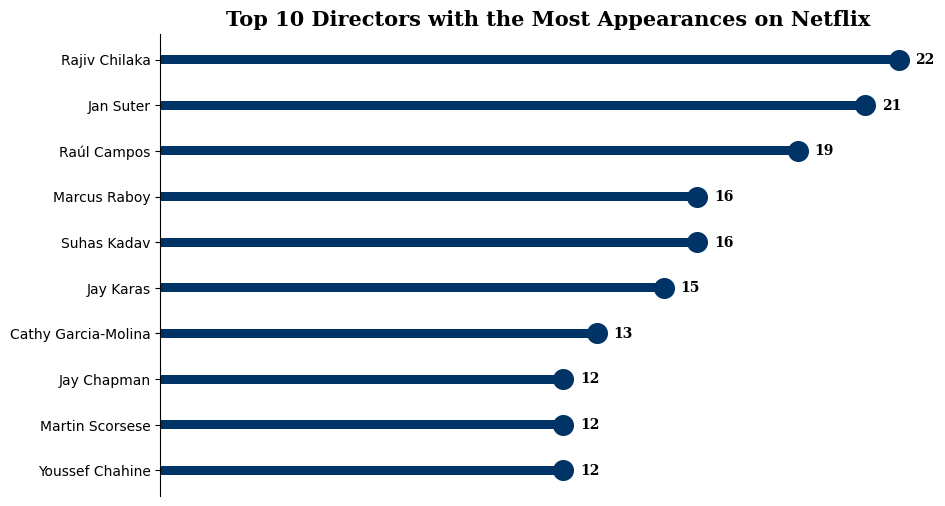

In [ ]:
# droping unknown director and reversing the df
d_cnt = d_cnt.iloc[-1:-11:-1]

#setting the plot style
fig,ax = plt.subplots(figsize = (10,6))

#creating the plot
ax.barh(y = d_cnt['director'],width = d_cnt['title'],height = 0.2,color = '#003366')
ax.scatter(y = d_cnt['director'], x = d_cnt['title'] , s = 200 , color = '#003366' )

#removing x-axis
ax.set_xticks([])

#adding label to each bar
for y,x in zip(d_cnt['director'],d_cnt['title']):
    ax.text( x + 0.5 , y , x,{'font':'serif', 'size':10,'weight':'bold'},va='center')

#removing the axis lines
for s in ['top','bottom','right']:
    ax.spines[s].set_visible(False)

#creating the title
ax.set_title('Top 10 Directors with the Most Appearances on Netflix',
                {'font':'serif', 'size':15,'weight':'bold'})

plt.show()

**👨🏽‍🎤Actor's with the Most Appearances**

* **Top 10 Actor's** who have appeared in most movies or TV shows.

In [ ]:
a_cnt = df1.groupby('cast')['title'].nunique().sort_values(ascending  = False)[0:11].reset_index()

a_cnt

,cast,title
0,Unknown cast,825
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Naseeruddin Shah,32
5,Takahiro Sakurai,32
6,Rupa Bhimani,31
7,Om Puri,30
8,Akshay Kumar,30
9,Yuki Kaji,29


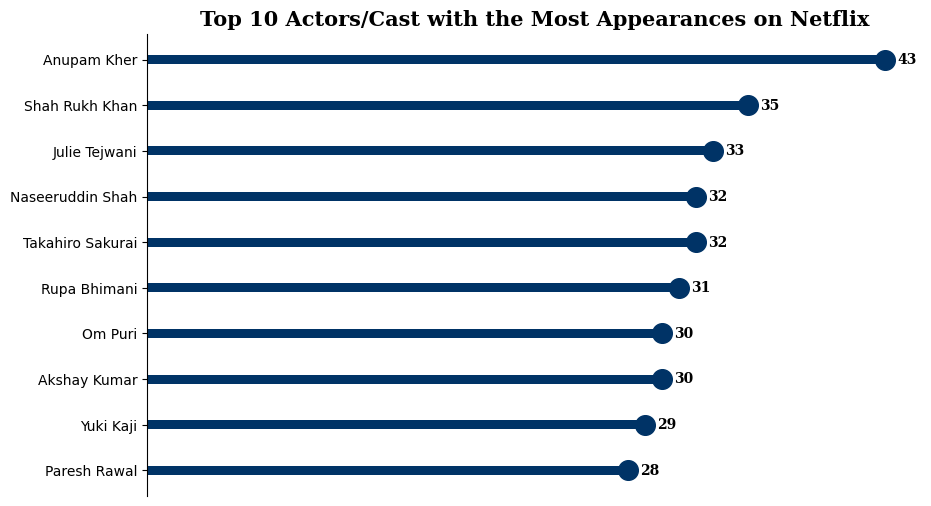

In [ ]:
# droping unknown actor and reversing the list
a_cnt = a_cnt.iloc[-1:-11:-1]

#setting the plot style
fig,ax = plt.subplots(figsize = (10,6))

#creating the plot
ax.barh(y = a_cnt['cast'],width = a_cnt['title'],height = 0.2,color = '#003366')
ax.scatter(y = a_cnt['cast'], x = a_cnt['title'] , s = 200 , color = '#003366' )

#removing x-axis
ax.set_xticks([])

#adding label to each bar
for y,x in zip(a_cnt['cast'],a_cnt['title']):
    ax.text( x + 0.7 , y , x,{'font':'serif', 'size':10,'weight':'bold'},va='center')

#removing the axis lines
for s in ['top','bottom','right']:
    ax.spines[s].set_visible(False)

#creating the title
ax.set_title('Top 10 Actors/Cast with the Most Appearances on Netflix',
            {'font':'serif', 'size':15,'weight':'bold'})

plt.show()

**🔍 Insights**
* Significantly, 8 out of the top 10 Actors/Cast with the highest number of appearances on Netflix are of Indian origin

**🌏 Global Streaming**

* **Top 10 Countries** which have produced the most Movies and most TV Shows on Netflix.

In [ ]:
#creating df for top 10 movies producing countries
df_movie = df1[df1['type'] == 'Movie']
df_movie = df_movie.groupby('country')['title'].nunique().sort_values(ascending = False).reset_index().loc[0:10]
df_movie = df_movie.drop(3)

#replacing country names in shortformat
df_movie['country'] = df_movie['country'].replace({'United States':'USA','United Kingdom':'UK','South Korea':'S korea'})
df_movie

,country,title
0,USA,2751
1,India,962
2,UK,532
4,Canada,319
5,France,303
6,Germany,182
7,Spain,171
8,Japan,119
9,China,114
10,Mexico,111


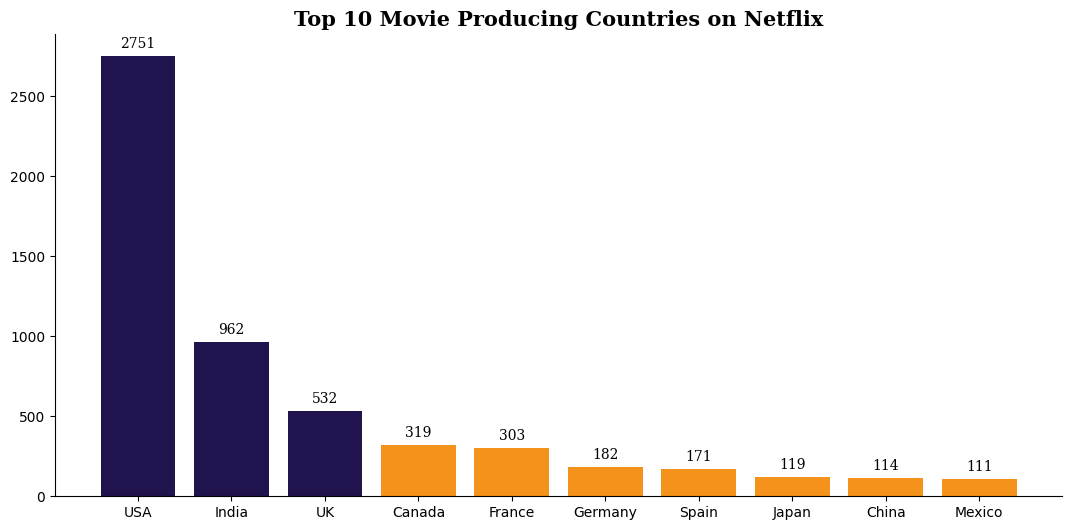

In [ ]:
#setting the plot style
fig,ax = plt.subplots(figsize = (13,6))

color_map = ['#F5921B' for i in range(10)]
color_map[0] = color_map[1] = color_map[2] = '#21134D'

#creating the plot
ax.bar(df_movie['country'],df_movie['title'],color = color_map,zorder = 2)

#adding valuecounts
for i in df_movie.index:
    ax.text(df_movie.loc[i,'country'],df_movie.loc[i,'title'] + 75, df_movie.loc[i,'title'],
           {'font':'serif', 'size':10},ha = 'center',va = 'center')

#removing the axis lines
for s in ['top','right']:
    ax.spines[s].set_visible(False)

#adding title to the visual
ax.set_title('Top 10 Movie Producing Countries on Netflix',
            {'font':'serif', 'size':15,'weight':'bold'})

plt.show()

In [ ]:
#creating df for top 10 tv shows producing countries
df_tv = df1[df1['type'] == 'TV Show']
df_tv = df_tv.groupby('country')['title'].nunique().sort_values(ascending = False).reset_index().loc[0:10]

#dropping unknown country column
df_tv = df_tv.drop(1)

#replacing country names in shortformat
df_tv['country'] = df_tv['country'].replace({'United States':'USA','United Kingdom':'UK','South Korea':'S korea'})
df_tv

,country,title
0,USA,938
2,UK,272
3,Japan,199
4,S korea,170
5,Canada,126
6,France,90
7,India,84
8,Taiwan,70
9,Australia,66
10,Spain,61


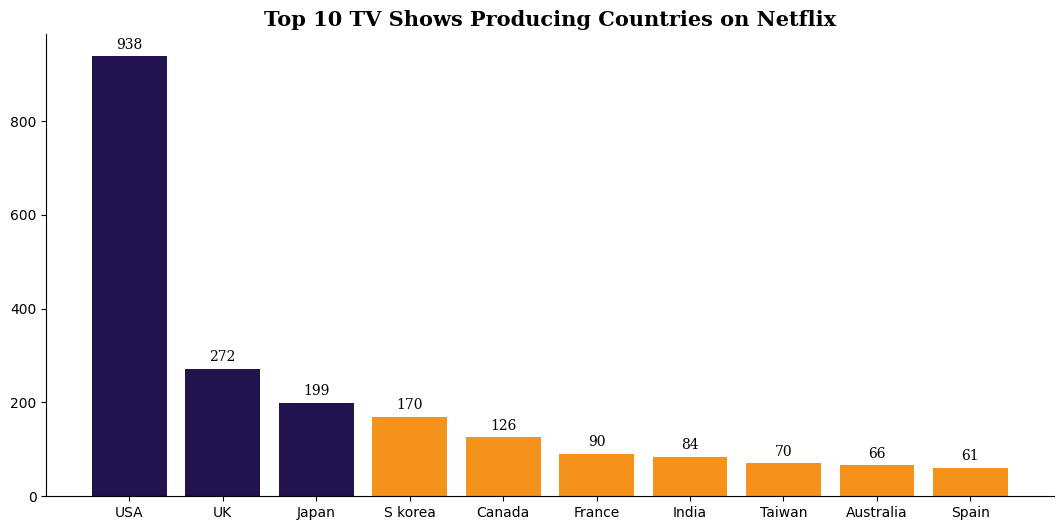

In [ ]:
#setting the plot style
fig,ax = plt.subplots(figsize = (13,6))

color_map = ['#F5921B' for i in range(10)]
color_map[0] = color_map[1] = color_map[2] = '#21134D'

#creating the plot
ax.bar(df_tv['country'],df_tv['title'],color = color_map,zorder = 2)

#adding valuecounts
for i in df_tv.index:
    ax.text(df_tv.loc[i,'country'],df_tv.loc[i,'title'] + 25, df_tv.loc[i,'title'],
           {'font':'serif', 'size':10},ha = 'center',va = 'center')

#removing the axis lines
for s in ['top','right']:
    ax.spines[s].set_visible(False)

#adding title to the visual
ax.set_title('Top 10 TV Shows Producing Countries on Netflix',
            {'font':'serif', 'size':15,'weight':'bold'})

plt.show()

**🔍 Insights**
* Netflix heavily invests in content production in the USA, its home country, to attract and retain subscribers. India, being the second on the list, signifies Netflix's strategic focus on the Indian market due to its significant population and growing demand for streaming services.

* Indian's prefer to watch movies over TV shows, on contrary South koreans perfer Tv shows over movies.

#**🎥 🆚 📺 Content Split**
* Content split for Top 10 Countries which have produced the most Movies and most TV Shows on Netflix.

In [ ]:
#creating a df for top 10 countries based on overall content count
c_cnt = df1.groupby('country')['title'].nunique().sort_values(ascending  = False).reset_index().loc[0:10]

c_cnt = c_cnt.drop(2) #dropping unknown country column

#renaming the countries
c_cnt['country'] = c_cnt['country'].replace({'United States':'USA','United Kingdom':'UK','South Korea':'S korea'})
c_cnt

,country,title
0,USA,3689
1,India,1046
3,UK,804
4,Canada,445
5,France,393
6,Japan,318
7,Spain,232
8,S korea,231
9,Germany,226
10,Mexico,169


In [ ]:
#creating a df to calculate split between tv-show and movies
df_merge = pd.merge(c_cnt,df_movie, on = 'country', how = 'left')
df_merge = pd.merge(df_merge,df_tv, on = 'country',how = 'left')

#renaming the columns
df_merge.rename(columns = {'title_x':'Total_Count','title_y':'Movie_Count','title':'TV_Show_Count'},inplace = True)

#filling the uncaptured information
df_merge.fillna({'Movie_Count': df_merge['Total_Count']-df_merge['TV_Show_Count']},inplace = True)
df_merge.fillna({'TV_Show_Count': df_merge['Total_Count']-df_merge['Movie_Count']},inplace = True)

#calculating the %split between movies and tv-shows
df_merge['Movie%'] = round((df_merge['Movie_Count']/df_merge['Total_Count'])*100)
df_merge['TV%'] = round((df_merge['TV_Show_Count']/df_merge['Total_Count'])*100)

#changing the data-type of columns to int
for i in df_merge.columns[1:]:
    df_merge[i] = df_merge[i].astype('int')

#sorting the df
df_merge = df_merge.sort_values(by= 'Movie%')
df_merge

,country,Total_Count,Movie_Count,TV_Show_Count,Movie%,TV%
7,S korea,231,61,170,26,74
5,Japan,318,119,199,37,63
2,UK,804,532,272,66,34
9,Mexico,169,111,58,66,34
3,Canada,445,319,126,72,28
6,Spain,232,171,61,74,26
0,USA,3689,2751,938,75,25
4,France,393,303,90,77,23
8,Germany,226,182,44,81,19
1,India,1046,962,84,92,8


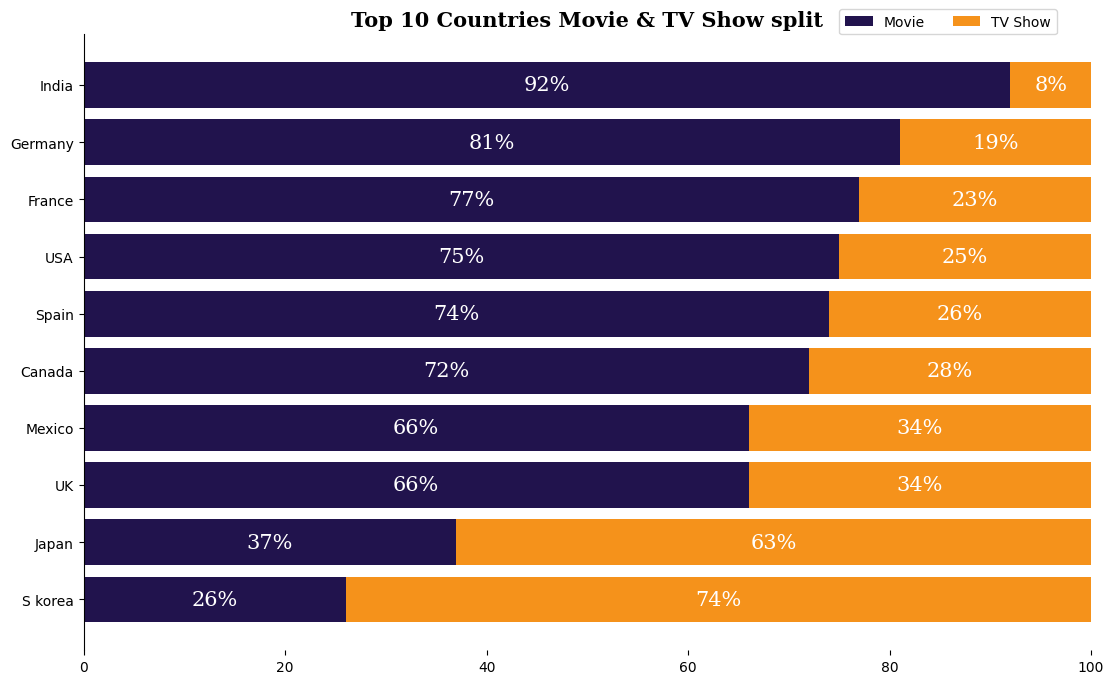

In [ ]:
#setting the plot style
fig,ax = plt.subplots(figsize = (13,8))

#plotting the visual
ax.barh(df_merge['country'],width = df_merge['Movie%'],color = '#21134D')
ax.barh(df_merge['country'],width = df_merge['TV%'],left = df_merge['Movie%'],color ='#F5921B')
ax.set(xlim=(0,100))

#adding % values in the bars

for i in df_merge.index:
    ax.text((df_merge.loc[i,'Movie%'])/2,df_merge.loc[i,'country'],f"{df_merge.loc[i,'Movie%']}%",
            va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',color='white')

    ax.text((df_merge.loc[i,'Movie%'] + (df_merge.loc[i,'TV%']/2)),df_merge.loc[i,'country'],f"{df_merge.loc[i,'TV%']}%",
            va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',color='white')

#removing the axis lines

for s in ['top','right','bottom']:
    ax.spines[s].set_visible(False)

#adding title to the visual
ax.set_title('Top 10 Countries Movie & TV Show split',
            {'font':'serif', 'size':15,'weight':'bold'})

#adding legend
ax.legend(['Movie','TV Show'],loc = (0.75,1),ncol = 2,fontsize = 10)

plt.show()

**🔍 Insights**

* **TV shows are more popular** than movies in **Asian countries**, especially South Korea and Japan, where they account for **more than 60%** of the content.

* **Movies** are more popular than **TV shows** in **European countries**,where they account for more than 65% of the content.

* **India** has the **highest percentage of movies (92%)** among all the countries, which may indicate a high demand for movies.


**📅 Best Month to launch a TV show/Movie?**

In [ ]:
month = df.groupby('month_added')['type'].value_counts()
month.name = 'count' # to avoid error while doing reset_index
month = month.reset_index()

#converting month_added to categorical type to help in future sorting steps
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month['month_added'] = pd.Categorical(month['month_added'], categories=months, ordered=True)

month.head()

,month_added,type,count
0,April,Movie,550
1,April,TV Show,210
2,August,Movie,519
3,August,TV Show,230
4,December,Movie,547


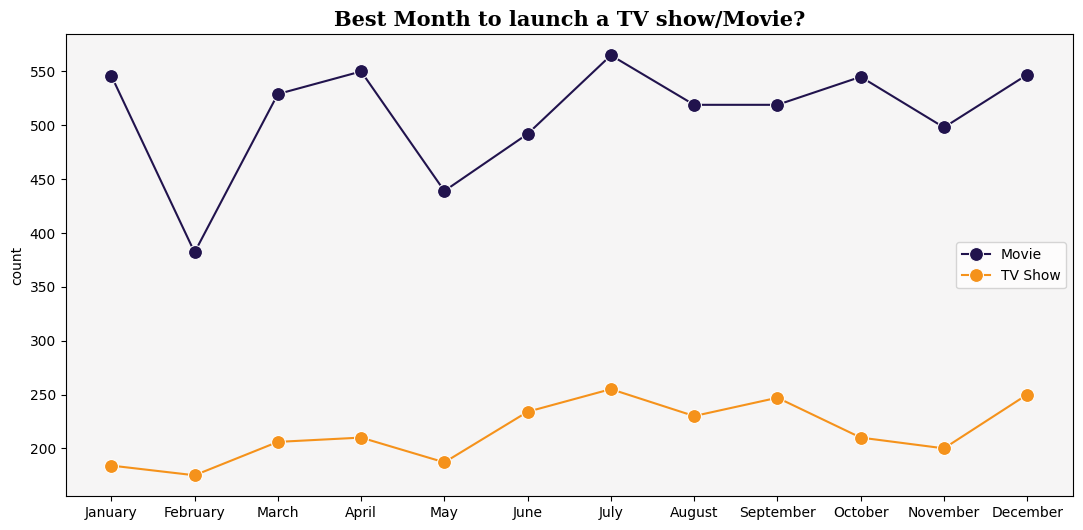

In [ ]:
# creating two different tables for movies and tv shows
month_movie = month.loc[month['type'] == 'Movie'].sort_values(by = 'month_added')
month_tv = month.loc[month['type'] == 'TV Show'].sort_values(by = 'month_added')

#setting the plot style
fig,ax = plt.subplots(figsize = (13,6))
ax.set_facecolor('#f6f5f5')

#creating the plot
sns.lineplot(data = month_movie, x = 'month_added', y = 'count',marker = 'o',markersize = 10,color ='#21134D',
             label = 'Movie',ax = ax)
sns.lineplot(data = month_tv, x = 'month_added', y = 'count',marker = 'o',markersize = 10,color ='#F5921B',
             label = 'TV Show', ax = ax)


#customizing axis label
plt.xlabel(None)

#customizing legend
plt.legend(loc = 'center right')

#creating the title
ax.set_title('Best Month to launch a TV show/Movie?',
            {'font':'serif', 'size':15,'weight':'bold'})

plt.show()

**🔍 Insights**


* The monthly upload count of both Movies and TV shows exhibits a remarkably **similar trend**.

* The months of **July, August, October, and December** record higher content upload counts, whereas **February, May, and November** experience comparatively lower counts.


**🎯 Target Audience**

**Target Audience distribution** for Movies and TV shows on Netflix

In [ ]:
movie_rating = df.loc[df['type'] == 'Movie','rating'].value_counts().reset_index()
tv_rating = df.loc[df['type'] == 'TV Show','rating'].value_counts().reset_index()

In [ ]:
#function for binning age groups
def age_group(x):
    if x in ['TV-Y', 'TV-G', 'G']:
        return 'Little Kids'
    elif x in ['TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG']:
        return 'Older Kids'
    elif x in ['PG-13','TV-14']:
        return 'Teens'
    else:
        return 'Adults'

#creating a df for binning the age groups
#binning ratings into age groups for movies
movie_rating['age'] = movie_rating['rating'].apply(lambda x:age_group(x))
age_m_rating = movie_rating.groupby('age')['count'].sum().sort_values(ascending = False).reset_index()

#binning ratings into age groups for tv shows
tv_rating['age'] = tv_rating['rating'].apply(lambda x:age_group(x))
age_t_rating = tv_rating.groupby('age')['count'].sum().reset_index()

age_m_rating

,age,count
0,Adults,2943
1,Teens,1918
2,Older Kids,972
3,Little Kids,298


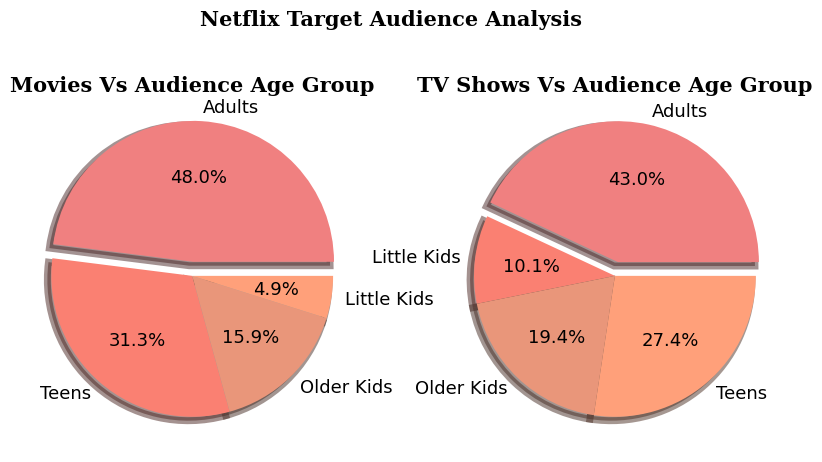

In [ ]:
#setting the plot style
fig = plt.figure(figsize = (10,5.5))
gs = fig.add_gridspec(1,2)

# creating pie chart for movies
ax0 = fig.add_subplot(gs[0,0])

color_map = ['LightCoral','Salmon','DarkSalmon','LightSalmon']
ax0.pie(age_m_rating['count'],labels = age_m_rating['age'],autopct = '%.1f%%',shadow = True,colors = color_map,
        explode = [0.1,0,0,0],wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})

#setting title for visual
ax0.set_title('Movies Vs Audience Age Group',
            {'font':'serif', 'size':15,'weight':'bold'})

# creating pie chart for tvshows
ax1 = fig.add_subplot(gs[0,1])

color_map = ['LightCoral','Salmon','DarkSalmon','LightSalmon']
ax1.pie(age_t_rating['count'],labels = age_t_rating['age'],autopct = '%.1f%%',shadow = True,colors = color_map,
        explode = [0.1,0,0,0],wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})

#setting title for visual
ax1.set_title('TV Shows Vs Audience Age Group',
            {'font':'serif', 'size':15,'weight':'bold'})

#setting overall title
fig.suptitle('Netflix Target Audience Analysis',fontproperties = {'family':'serif', 'size':15,'weight':'bold'})

plt.show()

**🔍 Insights**
1. Movies
 * Roughly half of the films available on the platform cater to adult audiences, while around 30% of the overall content is designed for teenagers, and the remaining 20% is tailored for children
2. TV Shows

 * The pattern holds true for television shows as well. The only distinction is that 30% of the content is targeted towards children, which signifies the inclusion of anime shows within Netflix's offerings.

**🧒🏻👨🏻👴🏻 Netfilx Age Demographics Across Geographies**

* **Age Group Distribution** Across Countries for Movies and TV shows on Netflix

In [ ]:
#function for binning age groups
def age_group(x):
    if x in ['TV-Y', 'TV-G', 'G']:
        return 'Little Kids'
    elif x in ['TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG']:
        return 'Older Kids'
    elif x in ['PG-13','TV-14']:
        return 'Teens'
    else:
        return 'Adults'

#creating a new col for age groups
df1['age_group'] = df1['rating'].apply(lambda x:age_group(x))

#creating a df for top 10 countries based on overall content count
c_cnt = df1.groupby('country')['title'].nunique().sort_values(ascending  = False).reset_index().loc[0:10]

c_cnt = c_cnt.drop(2) #dropping unknown country column

#creating a new df for top 1o countries with target age count
df2 = df1[['country','title','age_group']] #taking relevant columns from the df

df2 = df2[df2['country'].isin(c_cnt['country'])] #filtering top 10 count

df2 = df2.drop_duplicates(keep = 'first') #removing the duplicates to get exact count

df2 = df2.groupby(['country','age_group'])['title'].count().reset_index() #creating the df

df2 = df2.sort_values(by =['country','title'],ascending = [False,False]) #sorting the df

df2 = df2.rename({'title':'count'},axis = 1) #renaming the column

#changing the country names to shortform
df2['country'] = df2['country'].replace({'United States':'USA','United Kingdom':'UK','South Korea':'S korea'})

#adding a new percent column to denote the values in percentage
def percent(x):
    x['percent'] = round(x['count'] / x['count'].sum(),2)
    return x
df2 = df2.groupby('country').apply(lambda x:percent(x))
df2 = df2.sort_values('count',ascending=False)
df2 = df2.reset_index(drop = True)

df2.head(5)

<ipython-input-48-7e50ef581dc9>:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df2 = df2.groupby('country').apply(lambda x:percent(x))


,country,age_group,count,percent
0,USA,Adults,1808,0.49
1,USA,Teens,930,0.25
2,USA,Older Kids,696,0.19
3,India,Teens,583,0.56
4,UK,Adults,409,0.51


In [ ]:
#changing the df shape for making the heatmap
df_heatmap = df2.pivot(index='age_group',columns = 'country',values = 'percent')

#rearranging the df values in decreasing order of overall content count
country_order = ['USA','India','UK','Canada','France','Japan','Spain','S korea','Germany','Mexico']

age_order = ['Little Kids','Older Kids','Teens','Adults']

df_heatmap = df_heatmap.loc[age_order,country_order]

df_heatmap

country,USA,India,UK,Canada,France,Japan,Spain,S korea,Germany,Mexico
age_group,,,,,,,,,,
Little Kids,0.07,0.02,0.08,0.14,0.07,0.02,0.04,0.05,0.06,0.02
Older Kids,0.19,0.16,0.18,0.24,0.14,0.30,0.06,0.15,0.14,0.12
Teens,0.25,0.56,0.23,0.18,0.21,0.34,0.10,0.38,0.26,0.15
Adults,0.49,0.27,0.51,0.43,0.58,0.35,0.80,0.42,0.55,0.71


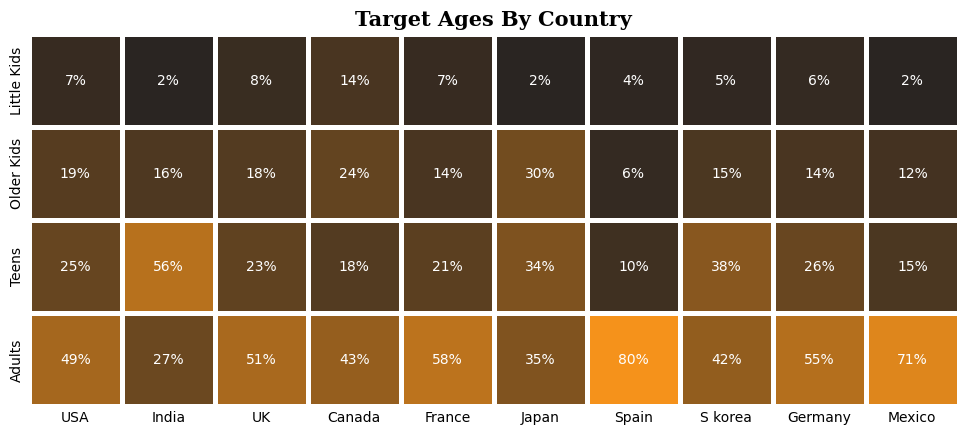

In [ ]:
#setting the plot style
fig,ax = plt.subplots(figsize = (12,12))

#plotting the visual
color = sns.color_palette("dark:#F5921B", as_cmap=True)

sns.heatmap(data = df_heatmap,ax=ax,cmap = color,square = True,linewidth = 2.5,cbar = False,annot = True,fmt = '.0%')

#removing axis labels
ax.set_xlabel('')
ax.set_ylabel('')

#removing tick marks but keeping the labels
ax.tick_params(axis = 'both',length = 0)

#setting title to visual
ax.set_title('Target Ages By Country',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()

**🔍 Insights**

**1. Teen-Centric Content in India, Japan and S Korea**

 * India and Japan stand out for having a considerably higher percentage of content targeted at "Teens." In Japan the trend continues to Older Kids as well. This suggests that there's a trend towards producing content that appeals to this age group

**2. Adult-Centric Content in Spain, Mexico,Germany and France**

 * Spain,Mexico,Germany and France have relatively high percentages of content aimed at "Adults." This could reflect a cultural inclination towards producing and consuming more mature content in these countries.

**3. Balanced Content in USA,UK and Canada**

 * USA,UK and Canada are closey aligned with their Netflix target ages suggesting a similar preference or taste among these markets.

**🕚Netflix's Movie and TV Show Runtimes**

* Analysis of runtimes for Movies and TV shows on Netflix

In [ ]:
#creating a df for tv show duration count
tv_duration = df.loc[df['type'] == 'TV Show','duration'].value_counts().reset_index()

#binning the seasons with less count for better analysis
tv_duration.replace({'1 Season':'1S',
                    '2 Seasons':'2S to 3S','3 Seasons':'2S to 3S',
                      '4 Seasons':'4S to 6S','5 Seasons':'4S to 6S','6 Seasons':'4S to 6S',
                     '7 Seasons':'7S to 9S','8 Seasons':'7S to 9S','9 Seasons':'7S to 9S',
                    '10 Seasons':'10S to 17S','11 Seasons':'10S to 17S','12 Seasons':'10S to 17S','13 Seasons':'10S to 17S',
                     '14 Seasons':'10S to 17S','15 Seasons':'10S to 17S','16 Seasons':'10S to 17S','17 Seasons':'10S to 17S'},
                    inplace = True)

#grouping the seasons and finding the count
tv_duration = tv_duration.groupby('duration')['count'].sum().sort_values(ascending = False).reset_index()

tv_duration.rename({'index':'Season','duration':'Count'},axis = 1,inplace = True)
tv_duration.columns=['Season','Count']
tv_duration

,Season,Count
0,1S,1793
1,2S to 3S,624
2,4S to 6S,193
3,7S to 9S,49
4,10S to 17S,17


In [ ]:
#creating a df for movie's duration count
movie_duration = df.loc[df['type'] == 'Movie','duration'].value_counts().reset_index()
# movie_duration
#removing 'min' from every entry to help in binning process
movie_duration['duration'] = movie_duration['duration'].str[:-3]

#converting the movie duration entries into integers
movie_duration['duration'] = movie_duration['duration'].astype('int')

#binning the values into categories
bin_range = [0,30,90,150,210,float('inf')]
bin_labels = ['Short Films', 'Medium Films', 'Standard Films', 'Long Films ', 'Epic Films ']

movie_duration['duration'] = pd.cut(movie_duration['duration'],bins = bin_range,labels = bin_labels)

#grouping the different movie types and finding the count
movie_duration = movie_duration.groupby('duration',observed=False)['count'].sum().sort_values(ascending = False,).reset_index()

movie_duration.columns=['Film Length','Count']
movie_duration

,Film Length,Count
0,Standard Films,3893
1,Medium Films,1863
2,Long Films,234
3,Short Films,130
4,Epic Films,11


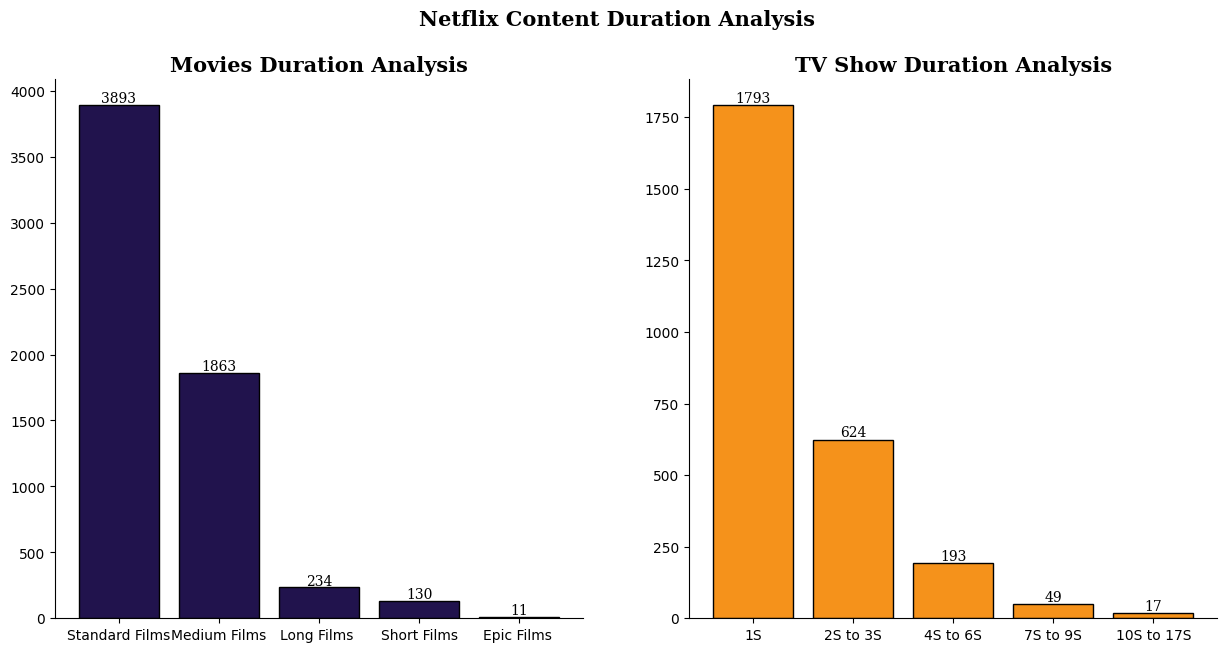

In [ ]:
#setting the plot style
fig = plt.figure(figsize = (15,7))
gs = fig.add_gridspec(1,2)

# creating visual for movies duration analysis
ax0 = fig.add_subplot(gs[0,0])

ax0.bar(movie_duration['Film Length'],height = movie_duration['Count'],edgecolor='black',color = '#21134D',zorder = 2)

#adding valuecounts
for i in movie_duration.index:
    ax0.text(movie_duration.loc[i,'Film Length'],movie_duration.loc[i,'Count'] + 50, movie_duration.loc[i,'Count'],
           {'font':'serif', 'size':10},ha = 'center',va = 'center')

#removing the axis lines

for s in ['top','right']:
    ax0.spines[s].set_visible(False)


#setting title for visual
ax0.set_title('Movies Duration Analysis',{'font':'serif', 'size':15,'weight':'bold'})

# creating visual for tvshows duration analysis
ax1 = fig.add_subplot(gs[0,1])

color_map = ['lightpink', 'deeppink', 'mediumvioletred', 'darkred', 'firebrick']
ax1.bar(tv_duration['Season'],height = tv_duration['Count'],edgecolor='black',color = '#F5921B',zorder = 2)

#adding valuecounts
for i in tv_duration.index:
    ax1.text(tv_duration.loc[i,'Season'],tv_duration.loc[i,'Count'] + 25, tv_duration.loc[i,'Count'],
           {'font':'serif', 'size':10},ha = 'center',va = 'center')


#removing the axis lines

for s in ['top','right']:
    ax1.spines[s].set_visible(False)

#setting title for visual
ax1.set_title('TV Show Duration Analysis',
            {'font':'serif', 'size':15,'weight':'bold'})

#setting overall title
fig.suptitle('Netflix Content Duration Analysis',fontproperties = {'family':'serif', 'size':15,'weight':'bold'})

plt.show()

**🔍 Insights**
**1. Movies**

 * The majority of films fall under the "Standard Films" category,indicating that viewers prefer movies that are of typical length for a movie-watching experience.

 * The higher count of "Medium Films" also indicates that viewers are interested in movies that are slightly longer than average, suggesting that movies with a bit more depth and storytelling might be well-received.

 * The presence of "Long Films", "Short Films" and "Epic Films" in the content library indicates that Netflix caters to a wide range of viewer preferences.

**2. TV Shows**

 * TV shows with a single season (1S) are the most common, suggesting that shorter series or limited series are popular on Netflix.
 * As the season duration increases, the count of TV shows decreases. This pattern indicates that viewers might prefer shorter series over longer ones.

#**⏲Analysing the time difference**

* Analysing the time difference between release and added years for Movies and TV shows on Netflix

In [ ]:
#creating df for top 10 movies producing countries
df_movie = df1[df1['type'] == 'Movie']
df_movie = df_movie.groupby('country')['title'].nunique().sort_values(ascending = False).reset_index().loc[0:10]

#dropping unknown country column
df_movie = df_movie.drop(3)

#creating df with top 10 movie producing countries and average difference between release year and added year
movie_year = df1[(df1['type'] == 'Movie') & (df1['country'].isin(df_movie['country']))]

#adding the difference column
movie_year.loc[:, 'diff'] = movie_year['year_added'] - movie_year['release_year']

#calculating the average diff
movie_year = movie_year.groupby('country')['diff'].mean().round().reset_index().sort_values(by = 'diff',ascending = False)

#converting to int
movie_year['diff'] = movie_year['diff'].astype('int')

movie_year

<ipython-input-54-c8595b447f3c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_year.loc[:, 'diff'] = movie_year['year_added'] - movie_year['release_year']


,country,diff
3,Germany,8
4,India,8
8,United Kingdom,8
9,United States,8
2,France,6
5,Japan,6
6,Mexico,5
0,Canada,4
1,China,4
7,Spain,2


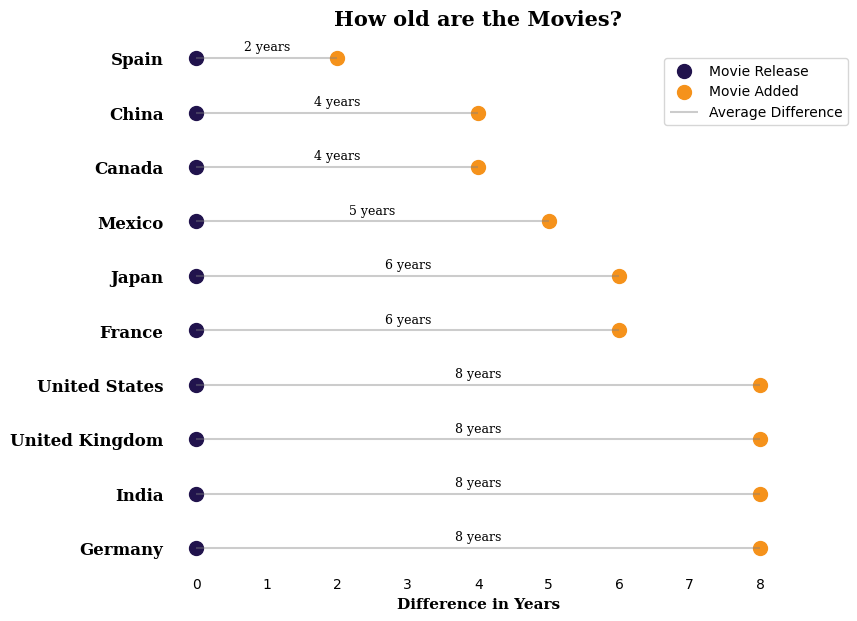

In [ ]:
#creating y-axis co-ordinates
yrange = range(1,len(movie_year)+1)
xrange = [0 for i in range(10)]

#setting the plot style
fig, ax = plt.subplots(figsize=(8, 7))


#plotting the scatter points
ax.scatter(xrange,yrange,color = '#21134D',s=100,label = 'Movie Release')
ax.scatter(movie_year['diff'],yrange,color = '#F5921B',s=100,label = 'Movie Added')

#plotting the horizontal lines between the points
ax.hlines(yrange,xmin = 0,xmax = movie_year['diff'],color = 'grey',alpha = 0.4,label = 'Average Difference')

#adding avg. difference values on lines
for i in range(10):
    ax.text(movie_year['diff'].iloc[i]/2,yrange[i]+0.2,f"{movie_year['diff'].iloc[i]} years",
            {'font':'serif', 'size':9,'fontweight':'light'},ha = 'center',va = 'center')

#removing the axislines
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

#removing tick marks but keeping the labels
ax.tick_params(axis = 'both',length = 0)

#customizing the y-axis labels
ax.set_yticks(yrange,movie_year['country'],fontsize= 12,fontfamily='serif',fontweight = 'bold')

#adding xlabel
ax.set_xlabel('Difference in Years',fontfamily='serif',fontsize = 11,fontweight = 'bold')

#Adding title to the graph
ax.set_title('How old are the Movies?',{'font':'serif', 'size':15,'weight':'bold'})

#adding legend
plt.legend(loc = (0.8,0.83))


plt.show()

In [ ]:
#creating df for top 10 tv shows producing countries
df_tv = df1[df1['type'] == 'TV Show']
df_tv = df_tv.groupby('country')['title'].nunique().sort_values(ascending = False).reset_index().loc[0:10]

#dropping unknown country column
df_tv = df_tv.drop(1)

#creating df with top 10 tv shows producing countries and average difference between release year and added year
tv_year = df1[(df1['type'] == 'TV Show') & (df1['country'].isin(df_tv['country']))]

#adding the difference column
tv_year['diff'] = tv_year['year_added'] - tv_year['release_year']

#calculating the average diff
tv_year = tv_year.groupby('country')['diff'].mean().round().reset_index().sort_values(by = 'diff',ascending = False)

#converting to int
tv_year['diff'] = tv_year['diff'].astype('int')

tv_year

<ipython-input-56-7f2cfde70a78>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_year['diff'] = tv_year['year_added'] - tv_year['release_year']


,country,diff
4,Japan,5
0,Australia,4
2,France,3
7,Taiwan,3
1,Canada,2
5,South Korea,2
8,United Kingdom,2
9,United States,2
3,India,1
6,Spain,1


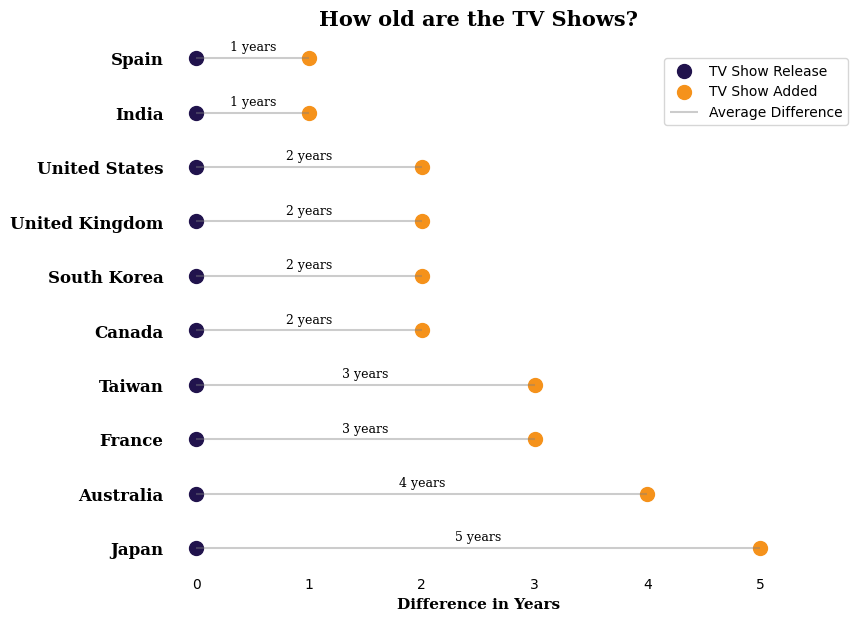

In [ ]:
#creating y-axis co-ordinates
yrange = range(1,len(tv_year)+1)
xrange = [0 for i in range(10)]

#setting the plot style
fig, ax = plt.subplots(figsize=(8, 7))


#plotting the scatter points
ax.scatter(xrange,yrange,color = '#21134D',s=100,label = 'TV Show Release')
ax.scatter(tv_year['diff'],yrange,color = '#F5921B',s=100,label = 'TV Show Added')

#plotting the horizontal lines between the points
ax.hlines(yrange,xmin = 0,xmax = tv_year['diff'],color = 'grey',alpha = 0.4,label = 'Average Difference')

#adding avg. difference values on lines
for i in range(10):
    ax.text(tv_year['diff'].iloc[i]/2,yrange[i]+0.2,f"{tv_year['diff'].iloc[i]} years",
            {'font':'serif', 'size':9,'fontweight':'light'},ha = 'center',va = 'center')

#removing the axislines
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

#removing tick marks but keeping the labels
ax.tick_params(axis = 'both',length = 0)

#customizing the y-axis labels
ax.set_yticks(yrange,tv_year['country'],fontsize= 12,fontfamily='serif',fontweight = 'bold')

#adding xlabel
ax.set_xlabel('Difference in Years',fontfamily='serif',fontsize = 11,fontweight = 'bold')

#Adding title to the graph
ax.set_title('How old are the TV Shows?',{'font':'serif', 'size':15,'weight':'bold'})

#adding legend
plt.legend(loc = (0.8,0.83))


plt.show()


**🔍 Insights**


 * In general, there seems to be a trend of adding movies to Netflix with a longer delay compared to TV shows. This could indicate that viewers might have a higher demand for recent TV shows than movies.


 * Spain has the lowest delay for movies (2 years) and TV shows (1 year), which could suggest that Spanish viewers have a preference for more recent content.

 * Countries like India, UK,USA and France have in general more delay in movies (8 to 6 years) and very less delay in TV Shows (1 to 3 years) indicating preference for recent TV shows and older movies in these countries.

* Japan has a consistent delay (5 to 6 years) in both Movies and TV Shows.

# Recommendations

* The data suggests that catering to local preferences is crucial for success. Netflix should continue to invest in producing content that resonates with different cultural and linguistic preferences around the world.

* Given the significant investment in content production in the USA and the emphasis on India, Netflix should continue to focus on these markets.